# 공분산과 상관계수

다변수 확률 변수의 대표값
>-공분산  
>-상관계수

## 샘플 공분산

- $x_i, y_i$ = i 번 째 x, y자료 값
- $m_x, m_y$ = x, y자료의 샘플 평균

(수식)

$$ s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m_x)(y_i-m_y) $$

(정의)

- 자료가 평균값을 기준으로 얼마나 떨어져있는지
- 사분면을 기준으로 (+)과 (-)값을 나타낸다. 
>- 크기 : 얼마나 떨어져 있는지
>- 방향 : 어느 사분면에 분포 되어 있는지

## 샘플 상관계수

(정의)

>- 분포의 크기는 분산만으로도 알 수 있다.
>- 자료 분포의 방향성만 분리해서 보는 것이 낫다.

공분산을 각각 샘플 표준편차($s^2$) 값으로 나누어 정규화(normalize) 한다.

$$r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}}$$

다른 종류의 상관계수와 비교할 때, 위의 상관계수는 **피어슨(Pearson) 상관계수**라 한다.

## 확률변수의 공분산과 상관계수

(공분산)

$$\text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]$$

(상관계수)

$$\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}}$$


Rho $\rho$에 관하여  

$(-1 \leq \rho \leq 1)$

>- $\rho$ = 1 : 완전 선형 상관 관계 (우상향)  
>- $\rho$ = 0 : 무상관 (독립과는 다른 개념)  
>- $\rho$ = -1 : 완전선형 반상관관계 (좌상향)  

In [19]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

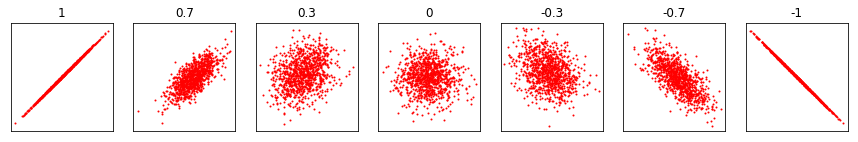

In [14]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(15, 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r)
plt.show()

### 그래프로 보는 상관계수

- 기울기로 양수, 음수 
- 직선 모양
>- 뚜렷할 수록 상관계수의 절대값이 커지고
>- 원에 가까워질 수록 절대값이 작아진다.

- 상관계수는 기울기와는 상관이 없다.

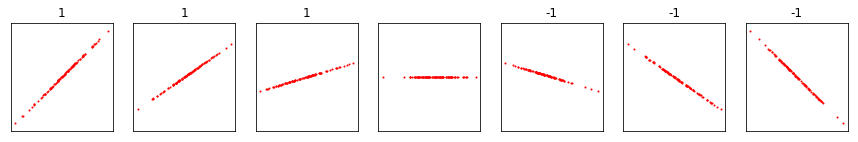

In [15]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(15, 2))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(1)
    if s < 0:
        plt.title(-1)
plt.show()

### Frank Ascombe의 데이터

같은 상관계수 (0.816) 이지만
- 데이터의 상관계수가 1 또는 0인 경우에도
- 하나의 특이값 자료에 의해 상관계수가 크게 달라질 수 있다.

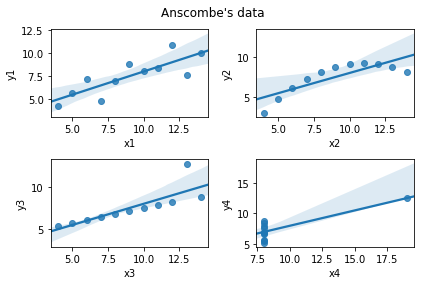

In [20]:
data = sm.datasets.get_rdataset("anscombe")
df = data.data

plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Anscombe's data")
plt.show()

### 다변수 확률변수의 공분산

$X = [X_1, X_2, X_3 .... X_i]$ 다변수 확률변수 일 때, 

샘플 공분산 행렬 (Sample Covariance Matrix)

$$
S =
\begin{bmatrix}
\begin{eqnarray}
s_{x_1}^2     \;\;  &  s_{x_1x_2} \;\;&  s_{x_1x_3} \;\;&  \cdots &  s_{x_1x_M} \\
s_{x_1x_2}   \;\;    &  s_{x_2}^2 \;\;&  s_{x_2x_3} \;\;&  \cdots &  s_{x_2x_M} \\
\vdots       &  \vdots &  \vdots &  \ddots &  \vdots \\
s_{x_1x_M}   \;\;    &  s_{x_2x_M} \;\;&  s_{x_3x_M} \;\;&  \cdots &  s_{x_M}^2 \\
\end{eqnarray}
\end{bmatrix}
$$

(수식)  

$X_0$는 평균을 제거하여 샘플 평균이 0이 된 데이터 행렬 (zero-mean feature matrix)

$$S = \dfrac{1}{N} X_0^TX_0$$

$X_0$ 구하는 방법 ($1_M$은 N차원 일(ones)벡터)

$$\mu = \dfrac{1}{N} X^T\mathbf{1_N}$$

$$X_0 = X - \mathbf{1_M}\mu^T$$

공분산 행렬은 $\Sigma$로 표기한다. ($X$는 다변수 확률변수, 즉 확률변수들의 벡터)

$$
\Sigma = \text{Cov}[X] = \text{E} \left[ (X - \text{E}[X])(X - \text{E}[X])^T \right]$$
$$
= 
\begin{bmatrix}
\begin{eqnarray}
\sigma_{x_1}^2     \;\;  &  \sigma_{x_1x_2} \;\;&  \sigma_{x_1x_3} \;\;&  \cdots &  \sigma_{x_1x_M} \\
\sigma_{x_1x_2}   \;\;    &  \sigma_{x_2}^2 \;\;&  \sigma_{x_2x_3} \;\;&  \cdots &  \sigma_{x_2x_M} \\
\vdots       &  \vdots &  \vdots &  \ddots &  \vdots \\
\sigma_{x_1x_M}   \;\;    &  \sigma_{x_2x_M} \;\;&  \sigma_{x_3x_M} \;\;&  \cdots &  \sigma_{x_M}^2 \\
\end{eqnarray}
\end{bmatrix}$$